In [5]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import pandas as pd
import lifelines
from lifelines.datasets import load_dd

from lifelines.plotting import plot_lifetimes
from numpy.random import uniform, exponential

data = load_dd()

data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [6]:
from lifelines import AalenAdditiveFitter

import patsy

X = patsy.dmatrix("un_continent_name + regime + start_year -1", data, return_type='dataframe')
X.columns

Index([u'un_continent_name[Africa]', u'un_continent_name[Americas]', u'un_continent_name[Asia]', u'un_continent_name[Europe]', u'un_continent_name[Oceania]', u'regime[T.Military Dict]', u'regime[T.Mixed Dem]', u'regime[T.Monarchy]', u'regime[T.Parliamentary Dem]', u'regime[T.Presidential Dem]', u'start_year'], dtype='object')

In [7]:
X.head()

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year
0,0,0,1,0,0,0,0,1,0,0,1946
1,0,0,1,0,0,0,0,0,0,0,1953
2,0,0,1,0,0,0,0,1,0,0,1963
3,0,0,1,0,0,0,0,0,0,0,1973
4,0,0,1,0,0,0,0,0,0,0,1978


In [8]:
aaf = AalenAdditiveFitter(coef_penalizer=1.0, fit_intercept=True)
X["T"] = data["duration"]
X["E"] = data["observed"]

aaf.fit(X, 'T', event_col="E")

 [-----------------100%-----------------] 1468 of 1468 complete in 0.8 sec


<lifelines.AalenAdditiveFitter: fitted with 1808 observations, 340 censored>

In [10]:
figsize(12.5, 8)
aaf.cumulative_hazards_.head()

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year,baseline
1,-0.051595,-0.082406,0.010666,0.154493,-0.060438,0.075333,0.086274,-0.133938,0.048077,0.127171,0.000116,-0.029280
2,-0.014713,-0.039471,0.095668,0.194251,-0.092696,0.115033,0.358702,-0.226233,0.168783,0.121862,0.000053,0.143039
3,0.007389,-0.064758,0.115121,0.170549,0.069371,0.161490,0.677347,-0.271183,0.328483,0.146234,0.000004,0.297672
4,-0.058418,0.011399,0.091784,0.205824,0.125722,0.220028,0.932674,-0.294900,0.365604,0.422617,0.000002,0.376311
5,-0.099282,0.106641,0.112083,0.150708,0.091900,0.241575,1.123860,-0.391103,0.536185,0.743913,0.000057,0.362049


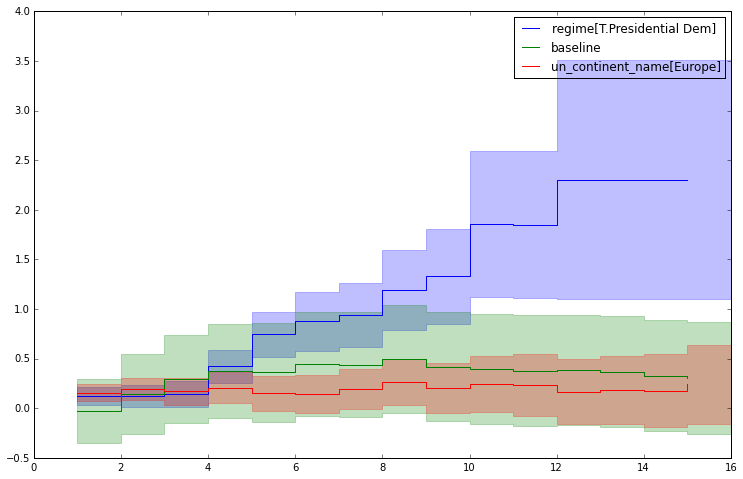

In [12]:
_ = aaf.plot(columns=['regime[T.Presidential Dem]', 'baseline', 'un_continent_name[Europe]'], ix=slice(1,15))